In [1]:
# Dependencies and Setup
import requests
import time
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import sklearn.datasets as dta
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import seaborn as sns

In [2]:
# Set the base URL
covid_url = 'https://api.opencovid.ca/timeseries?geo=pt&fill=false&version=true&pt_names=canonical&hr_names=hruid&fmt=json'
covid_confirmed_cases_response = requests.get(covid_url).json()
# Define an empty list to fetch the covid confirmed cases
covid_cases_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_confirmed_cases_response['data']['cases']:
    covid_cases_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative confirmed cases": case['value'], "Confirmed cases per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [4]:
covid_confirmed_cases_data_df = pd.DataFrame(covid_cases_data)
# Show Record Count
covid_confirmed_cases_data_df.head(3)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day
0,Alberta,2020-03-05,1,1
1,Alberta,2020-03-06,1,0
2,Alberta,2020-03-07,2,1


In [5]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries?geo=pt&fill=false&version=true&pt_names=canonical&hr_names=hruid&fmt=json'
covid_deaths_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
covid_death_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_deaths_response['data']['deaths']:
    covid_death_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative death cases": case['value'], "Deaths per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [7]:
death_data_df = pd.DataFrame(covid_death_data)
death_data_df.head(3)

,Province,Date,Cumulative death cases,Deaths per day
0,Alberta,2020-03-08,0,0
1,Alberta,2020-03-09,0,0
2,Alberta,2020-03-10,0,0


In [8]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries?geo=pt&fill=false&version=true&pt_names=canonical&hr_names=hruid&fmt=json'
covid_hospitalization_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
hospitalization_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_hospitalization_response['data']['hospitalizations']:
    hospitalization_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative hospitalizations cases": case['value'], "hospitalizations per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [9]:
hospitalization_data_df = pd.DataFrame(hospitalization_data)
hospitalization_data_df.head(3)

,Province,Date,Cumulative hospitalizations cases,hospitalizations per day
0,Alberta,2020-01-25,0,0
1,Alberta,2020-01-26,0,0
2,Alberta,2020-01-27,0,0


In [10]:
# Set the base URL
covid_url = 'https://api.opencovid.ca/timeseries?geo=pt&fill=false&version=true&pt_names=canonical&hr_names=hruid&fmt=json'
covid_vaccinationdose1_coverage_response = requests.get(covid_url).json()
# Define an empty list to fetch the covid confirmed cases
covid_vaccinationdose1_coverage_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_vaccinationdose1_coverage_response['data']['vaccine_coverage_dose_1']:
    covid_vaccinationdose1_coverage_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative vaccine coverage dose1": case['value'], "Vaccine coverage dose1 per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [11]:
covid_vaccinationdose1_coverage_data_df = pd.DataFrame(covid_vaccinationdose1_coverage_data)
# Show Record Count
covid_vaccinationdose1_coverage_data_df.head(3)

,Province,Date,Cumulative vaccine coverage dose1,Vaccine coverage dose1 per day
0,Alberta,2020-12-19,0.0,0.0
1,Alberta,2020-12-20,0.0,0.0
2,Alberta,2020-12-21,0.0,0.0


In [12]:
# Mering the three DataFrames named as covid_confirmed_cases_data_df, death_data_df and hospitalization_data_df on columns Province and Date as they are common columns in all of the dataframes
# covid_combined_df = pd.merge(covid_confirmed_cases_data_df, pd.merge(death_data_df, hospitalization_data_df, on=['Province', 'Date']), on=['Province', 'Date'])
# covid_combined_df
covid_combined_df = covid_confirmed_cases_data_df.merge(death_data_df, on=['Province', 'Date']).merge(hospitalization_data_df, on=['Province', 'Date']).merge(covid_vaccinationdose1_coverage_data_df, on=['Province', 'Date'])
covid_combined_df.describe()

,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Cumulative vaccine coverage dose1,Vaccine coverage dose1 per day
count,9.266000e+03,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000
mean,2.206529e+05,422.826139,2750.898878,3.817721,306.864882,-0.003993,65.462174,0.119264
std,3.549360e+05,1155.429091,4287.182875,9.558755,504.375916,23.008539,28.684811,0.684302
min,2.400000e+01,-4.000000,0.000000,-12.000000,0.000000,-314.000000,0.000000,-9.100000
25%,2.435250e+03,0.000000,21.000000,0.000000,0.000000,0.000000,60.275000,0.000000
50%,5.581200e+04,58.000000,571.500000,0.000000,69.000000,0.000000,79.000000,0.000000
75%,3.092628e+05,409.000000,3300.000000,3.000000,362.750000,0.000000,83.900000,0.000000
max,1.614845e+06,19509.000000,16485.000000,112.000000,4190.000000,272.000000,95.700000,17.500000


In [13]:
covid_combined_final_df = covid_combined_df[(covid_combined_df['Cumulative confirmed cases'] >= 0) & (covid_combined_df['Confirmed cases per day'] >= 0) & (covid_combined_df['Cumulative death cases'] >= 0) & (covid_combined_df['Deaths per day'] >= 0) & (covid_combined_df['Cumulative hospitalizations cases'] >= 0)& (covid_combined_df['hospitalizations per day'] >= 0)& (covid_combined_df['Cumulative vaccine coverage dose1'] >= 0) & (covid_combined_df['Vaccine coverage dose1 per day'] >= 0)]
covid_combined_final_df = covid_combined_final_df.dropna()
covid_combined_final_df.describe()

,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Cumulative vaccine coverage dose1,Vaccine coverage dose1 per day
count,7.356000e+03,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000
mean,1.724288e+05,352.132137,2035.370038,2.755302,241.107259,4.919250,66.942890,0.120609
std,3.008376e+05,1175.815219,3576.557687,8.613583,432.409322,18.230051,27.916362,0.661898
min,2.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.648250e+03,0.000000,12.000000,0.000000,0.000000,0.000000,63.375000,0.000000
50%,4.712300e+04,16.000000,258.000000,0.000000,33.000000,0.000000,79.500000,0.000000
75%,1.549900e+05,231.250000,2277.250000,1.000000,292.000000,0.000000,84.000000,0.000000
max,1.614229e+06,19509.000000,16478.000000,112.000000,4190.000000,272.000000,95.700000,17.500000


In [14]:
covid_combined_final_df['Mortality rate'] = round(((covid_combined_final_df['Cumulative death cases'] / covid_combined_final_df['Cumulative confirmed cases']) * 100), 3)
covid_combined_final_df['Daily mortality rate'] = round(((covid_combined_final_df['Deaths per day'] / covid_combined_final_df['Confirmed cases per day']) * 100), 3)
covid_combined_final_df.describe()

,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Cumulative vaccine coverage dose1,Vaccine coverage dose1 per day,Mortality rate,Daily mortality rate
count,7.356000e+03,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000,4880.0000
mean,1.724288e+05,352.132137,2035.370038,2.755302,241.107259,4.919250,66.942890,0.120609,0.981849,inf
std,3.008376e+05,1175.815219,3576.557687,8.613583,432.409322,18.230051,27.916362,0.661898,0.755028,NaN
min,2.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,1.648250e+03,0.000000,12.000000,0.000000,0.000000,0.000000,63.375000,0.000000,0.511750,0.0000
50%,4.712300e+04,16.000000,258.000000,0.000000,33.000000,0.000000,79.500000,0.000000,0.894000,0.0000
75%,1.549900e+05,231.250000,2277.250000,1.000000,292.000000,0.000000,84.000000,0.000000,1.312000,0.7455
max,1.614229e+06,19509.000000,16478.000000,112.000000,4190.000000,272.000000,95.700000,17.500000,4.505000,inf


In [15]:
# sort the DataFrame by date in ascending order as covid_combined_final_sorted
covid_combined_final_df['Date'] = pd.to_datetime(covid_combined_final_df['Date'])
covid_combined_final_sorted = covid_combined_final_df.sort_values(by='Date')

In [17]:
# fill missing values with zero
covid_combined_final_sorted_filled = covid_combined_final_sorted.fillna(value=0)
# remove inf and replace with zero in column 'A'
covid_combined_final_sorted_filled['Daily mortality rate'] = covid_combined_final_sorted_filled['Daily mortality rate'].replace([np.inf, -np.inf], 0)

In [19]:
covid_combined_final_sorted_filled.head(3)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Cumulative vaccine coverage dose1,Vaccine coverage dose1 per day,Mortality rate,Daily mortality rate
0,Alberta,2020-12-19,89993,1306,851,10,777,18,0.0,0.0,0.946,0.766
856,British Columbia,2020-12-19,46932,579,724,0,356,0,0.1,0.1,1.543,0.000
5220,Nunavut,2020-12-19,259,0,0,0,0,0,0.0,0.0,0.000,0.000


In [20]:
covid_combined_final_sorted_filled.to_csv("Covid19_data_project.csv", index=False)

In [21]:
covid_dataframe_df = covid_combined_final_sorted_filled
covid_dataframe_df.head(3)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Cumulative vaccine coverage dose1,Vaccine coverage dose1 per day,Mortality rate,Daily mortality rate
0,Alberta,2020-12-19,89993,1306,851,10,777,18,0.0,0.0,0.946,0.766
856,British Columbia,2020-12-19,46932,579,724,0,356,0,0.1,0.1,1.543,0.000
5220,Nunavut,2020-12-19,259,0,0,0,0,0,0.0,0.0,0.000,0.000


In [22]:
# Assumptions made recovered data/Cured data was not available in the API so we assumed to use the cumulative hospitalizations cases to calculate the cumulative active cases
covid_dataframe_df['Cumulative Active Cases'] = covid_dataframe_df['Cumulative confirmed cases'] - (covid_dataframe_df['Cumulative death cases'] + covid_dataframe_df['Cumulative hospitalizations cases'])
covid_dataframe_df['Active Cases per day'] = covid_dataframe_df['Confirmed cases per day'] - (covid_dataframe_df['Deaths per day'] + covid_dataframe_df['hospitalizations per day'])
covid_dataframe_df.head(3)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Cumulative vaccine coverage dose1,Vaccine coverage dose1 per day,Mortality rate,Daily mortality rate,Cumulative Active Cases,Active Cases per day
0,Alberta,2020-12-19,89993,1306,851,10,777,18,0.0,0.0,0.946,0.766,88365,1278
856,British Columbia,2020-12-19,46932,579,724,0,356,0,0.1,0.1,1.543,0.000,45852,579
5220,Nunavut,2020-12-19,259,0,0,0,0,0,0.0,0.0,0.000,0.000,259,0


In [23]:
Active_cases_per_province = covid_dataframe_df.groupby('Province').max()[['Cumulative Active Cases', 'Date']].sort_values(['Cumulative Active Cases'], ascending = False).reset_index()
# Active_cases_per_province = Active_cases_per_province.iloc[0:5]
Active_cases_per_province_df = Active_cases_per_province[['Province', 'Cumulative Active Cases']]
Active_cases_per_province_df = Active_cases_per_province_df.set_index('Province')
Active_cases_per_province_df.head(13)

,Cumulative Active Cases
Province,
Ontario,1597066
Quebec,1161158
Alberta,625662
British Columbia,393391
Manitoba,153062
Saskatchewan,145617
New Brunswick,83576
Nova Scotia,73053
Prince Edward Island,53893


In [24]:
Vaccine_dose1_df = pd.read_csv('C:/Users/panka/OneDrive/Desktop/Class Folder/Github/COVID-19_project_work/vaccination-coverage-byAgeAndSex-overTimeDownload.csv',delimiter=',', header=0, na_values='NaN')
Vaccine_dose1_df['Date'] = pd.to_datetime(Vaccine_dose1_df['Date'])
Vaccine_dose1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81228 entries, 0 to 81227
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Province                                     81228 non-null  object        
 1   Date                                         81228 non-null  datetime64[ns]
 2   Sex                                          81228 non-null  object        
 3   Age                                          81228 non-null  object        
 4   Cummulative number of people (Vaccinedose1)  81228 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.1+ MB


In [25]:
merged_df = pd.merge(covid_dataframe_df, Vaccine_dose1_df, on=['Province', 'Date'], how="inner")
# Remove NaN values from specific columns
# Assuming you want to remove NaN values and other common missing value representations from the 'column_name' column
missing_values = ['na', 'N/A', 'null', '']

# Replace missing value representations with NaN
merged_df['Cummulative number of people (Vaccinedose1)'] = merged_df['Cummulative number of people (Vaccinedose1)'].replace(missing_values, float('nan'))

# Drop NaN values from the column
merged_df.dropna(subset=['Cummulative number of people (Vaccinedose1)'], inplace=True)

merged_df.to_csv("Covid19_data_vaccine.csv", index=False)
# merged_df.sample(100)

In [26]:
# Assuming you want to convert the 'Cummulative number of people (Vaccinedose1)' column to int64
merged_df['Cummulative number of people (Vaccinedose1)'] = merged_df['Cummulative number of people (Vaccinedose1)'].astype('int64')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57036 entries, 0 to 57389
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Province                                     57036 non-null  object        
 1   Date                                         57036 non-null  datetime64[ns]
 2   Cumulative confirmed cases                   57036 non-null  int64         
 3   Confirmed cases per day                      57036 non-null  int64         
 4   Cumulative death cases                       57036 non-null  int64         
 5   Deaths per day                               57036 non-null  int64         
 6   Cumulative hospitalizations cases            57036 non-null  int64         
 7   hospitalizations per day                     57036 non-null  int64         
 8   Cumulative vaccine coverage dose1            57036 non-null  float64       


In [27]:
merged_df.head(5)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Cumulative vaccine coverage dose1,Vaccine coverage dose1 per day,Mortality rate,Daily mortality rate,Cumulative Active Cases,Active Cases per day,Sex,Age,Cummulative number of people (Vaccinedose1)
0,British Columbia,2020-12-19,46932,579,724,0,356,0,0.1,0.1,1.543,0.0,45852,579,All sexes,0–15,2
1,British Columbia,2020-12-19,46932,579,724,0,356,0,0.1,0.1,1.543,0.0,45852,579,All sexes,16–69,3575
2,British Columbia,2020-12-19,46932,579,724,0,356,0,0.1,0.1,1.543,0.0,45852,579,All sexes,70–74,46
3,British Columbia,2020-12-19,46932,579,724,0,356,0,0.1,0.1,1.543,0.0,45852,579,All sexes,75–79,10
4,British Columbia,2020-12-19,46932,579,724,0,356,0,0.1,0.1,1.543,0.0,45852,579,All sexes,80+,1


In [28]:
Active_cases_per_province = merged_df.groupby('Province').max()[['Cumulative Active Cases', 'Date']].sort_values(['Cumulative Active Cases'], ascending = False).reset_index()
# Active_cases_per_province = Active_cases_per_province.iloc[0:5]
Active_cases_per_province_df = Active_cases_per_province[['Province', 'Cumulative Active Cases']]
Active_cases_per_province_df = Active_cases_per_province_df.set_index('Province')
Active_cases_per_province_df.head(13)

,Cumulative Active Cases
Province,
Ontario,1588976
Quebec,1161158
Alberta,625662
British Columbia,392138
Manitoba,153062
Saskatchewan,145182
New Brunswick,82764
Nova Scotia,72067
Prince Edward Island,53715


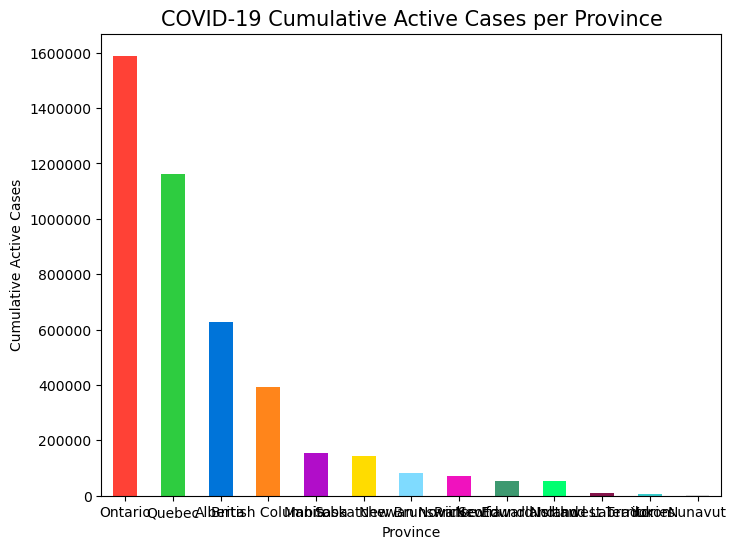

In [29]:
# set the colors for the bars
colors = ['#FF4136', '#2ECC40', '#0074D9', '#FF851B', '#B10DC9', '#FFDC00','#7FDBFF', '#F012BE', '#3D9970', '#01FF70', '#85144b', '#39CCCC', '#DDDDDD']
ax = Active_cases_per_province_df.plot.bar(y = 'Cumulative Active Cases', figsize=(8,6), color = colors, rot=0, legend=None)
# set the axis labels and title
ax.set_xlabel('Province')
ax.set_ylabel('Cumulative Active Cases')
ax.set_title("COVID-19 Cumulative Active Cases per Province", size = 15)
# display the plot
plt.savefig("COVID-19 Cumulative Active Cases per Province.png")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))
plt.show()

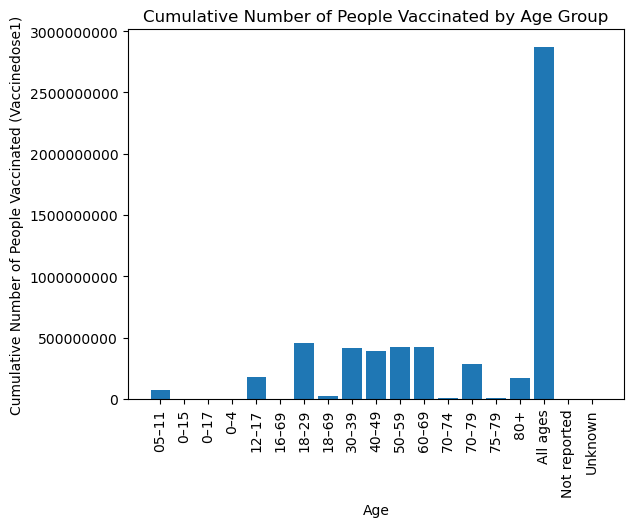

In [30]:
import matplotlib.pyplot as plt

# Group the data by 'Age' and calculate the sum of 'Cummulative number of people (Vaccinedose1)'
grouped_df = merged_df.groupby('Age')['Cummulative number of people (Vaccinedose1)'].sum().reset_index()

# Sort the data by 'Age' column
grouped_df = grouped_df.sort_values('Age')

# Plot the data
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))
plt.bar(grouped_df['Age'], grouped_df['Cummulative number of people (Vaccinedose1)'])
plt.xlabel('Age')
plt.ylabel('Cumulative Number of People Vaccinated (Vaccinedose1)')
plt.title('Cumulative Number of People Vaccinated by Age Group')
plt.xticks(rotation=90)
# Save the plot as a PNG image
plt.savefig('vaccination_plot.png', bbox_inches='tight')
plt.show()

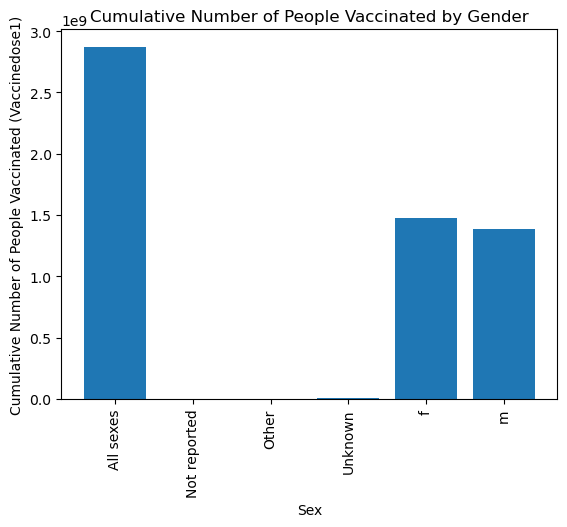

In [31]:
# Group the data by 'sex' and calculate the sum of 'Cummulative number of people (Vaccinedose1)'
grouped_df = merged_df.groupby('Sex')['Cummulative number of people (Vaccinedose1)'].sum().reset_index()

# Sort the data by 'Age' column
grouped_df = grouped_df.sort_values('Sex')

# Plot the data

plt.bar(grouped_df['Sex'], grouped_df['Cummulative number of people (Vaccinedose1)'])
plt.xlabel('Sex')
plt.ylabel('Cumulative Number of People Vaccinated (Vaccinedose1)')
plt.title('Cumulative Number of People Vaccinated by Gender')
plt.xticks(rotation=90)

# Save the plot as a PNG image
plt.savefig('vaccination_plot.png', bbox_inches='tight')
plt.show()

In [56]:
# Group the data by 'Sex' and 'Age' and calculate the sum of 'Cummulative number of people (Vaccinedose1)'
grouped_df = merged_df.groupby(['Sex', 'Age'])['Cummulative number of people (Vaccinedose1)'].sum().reset_index()
# Sort the data by 'Age' column
grouped_df = grouped_df.sort_values('Age')
# Create a boolean mask to filter rows based on 'Sex' column
mask = (grouped_df['Sex'] == 'm') | (grouped_df['Sex'] == 'f') | (grouped_df['Sex'] == 'Other')
# Apply the mask to the DataFrame
filtered_df = grouped_df[mask]
filtered_df
# age_mask = (filtered_df['Age'] == 0-4) | (filtered_df['Age'] == 05-11) | (filtered_df['Age'] == 12-17)
# age_filtered_df = filtered_df[age_mask]
# age_filtered_df.head(10)

,Sex,Age,Cummulative number of people (Vaccinedose1)
90,m,05–11,19271185
71,f,05–11,18431145
38,Other,05–11,3852
91,m,0–15,13
72,f,0–15,9
92,m,0–17,119668
73,f,0–17,144827
39,Other,0–17,0
93,m,0–4,535522
40,Other,0–4,232
